# 01. Neural Network Regression with TensorFlow



## Typical architecture of a regresison neural network

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/*

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def plot_predictions(train_data,
                     train_label,
                     test_data,
                     test_labels,
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

## Evaluating predictions

In [5]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [6]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [7]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [10]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [11]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

In [12]:
# Set random seed
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100,verbose=0)

In [13]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7284.7183 - mae: 7284.7183


[7284.71826171875, 7284.71826171875]

In [14]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4800.6636 - mae: 4800.6636


[4800.66357421875, 4800.66357421875]

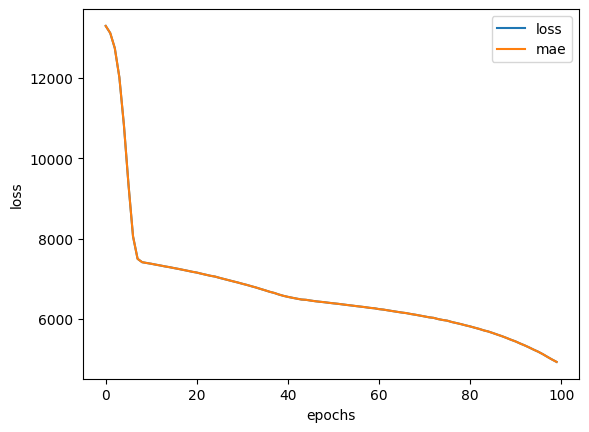

In [16]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [17]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [18]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3488.5989 - mae: 3488.5986


(3488.598876953125, 3488.5986328125)

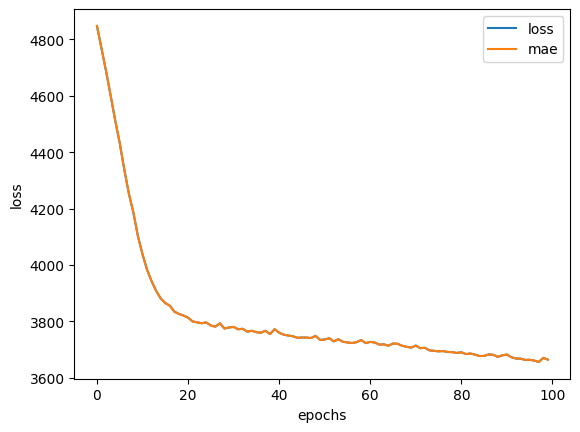

In [19]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

## Preprocessing data (normalization and standardization)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [21]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Now we've normalized it and one-hot encoding it, what does our data look like now?

In [23]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [24]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [25]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [26]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [27]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3168.3125 - mae: 3168.3125


In [28]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3488.5986328125, 3168.3125)

In [29]:
# SKLEARN CLASSES & LIBRARIES

# importing train test split & GridSearchCV (for performing grid search on various model parmeters)
from sklearn.model_selection import train_test_split, GridSearchCV

# import StandarScaler for data Standardization
from sklearn.preprocessing import StandardScaler

# importing linear regression, polynomial regression, Regulariation classes (Ridge, Lasso, ElasticNet)
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

# importing model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

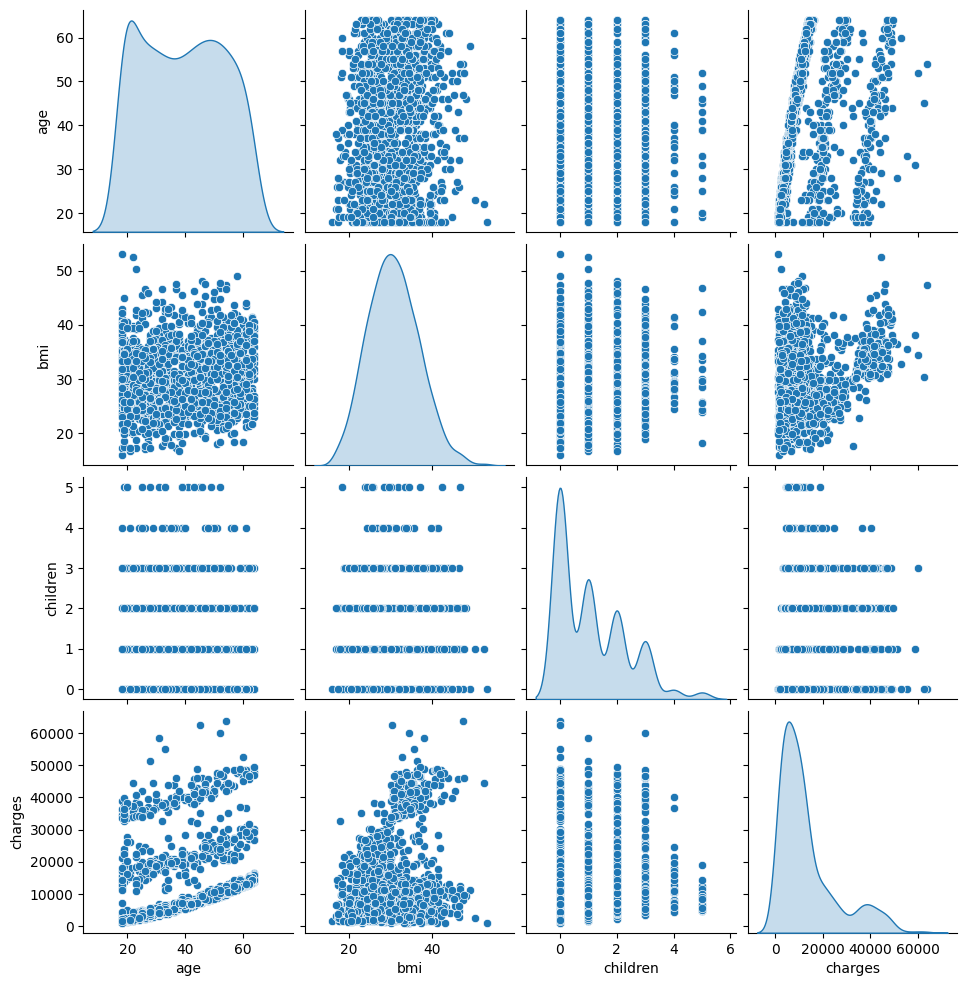

In [30]:
import seaborn as sns
sns.pairplot(insurance, diag_kind='kde');

In [31]:
print(insurance.head())
df_encoded = pd.get_dummies(insurance, columns=['sex','region','smoker'])

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


                       age       bmi  children   charges  sex_female  \
age               1.000000  0.109272  0.042469  0.299008    0.020856   
bmi               0.109272  1.000000  0.012759  0.198341   -0.046371   
children          0.042469  0.012759  1.000000  0.067998   -0.017163   
charges           0.299008  0.198341  0.067998  1.000000   -0.057292   
sex_female        0.020856 -0.046371 -0.017163 -0.057292    1.000000   
sex_male         -0.020856  0.046371  0.017163  0.057292   -1.000000   
region_northeast  0.002475 -0.138156 -0.022808  0.006349    0.002425   
region_northwest -0.000407 -0.135996  0.024806 -0.039905    0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982   -0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210    0.004184   
smoker_no         0.025019 -0.003750 -0.007673 -0.787251    0.076185   
smoker_yes       -0.025019  0.003750  0.007673  0.787251   -0.076185   

                  sex_male  region_northeast  region_northwest 

<Axes: >

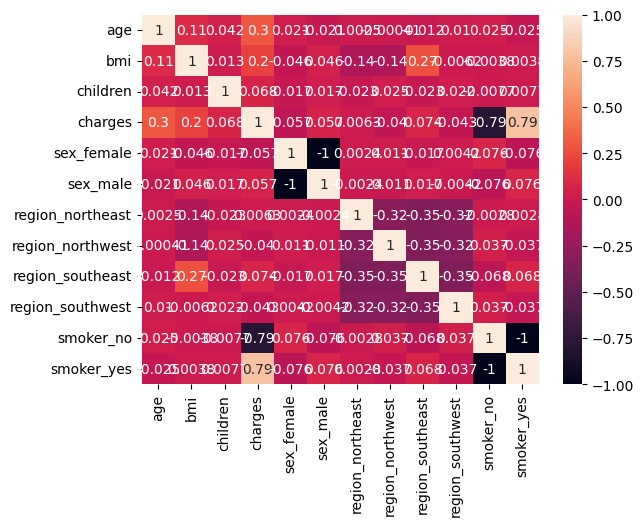

In [32]:
print(df_encoded.corr())
sns.heatmap(df_encoded.corr(),annot=True)

In [33]:
X_train_normal,X_test_normal,y_train,y_test

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.7

In [34]:
linear_model = LinearRegression()

In [35]:
linear_model.fit(X_train_normal,y_train)

LinearRegression()

In [36]:
# making predictions on test data using trained model
linear_predict = linear_model.predict(X_test_normal)

# checking predicted values
linear_predict

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [37]:

linear_MAE = mean_absolute_error(y_test, linear_predict)
linear_MSE = mean_squared_error(y_test, linear_predict)
linear_RMSE = np.sqrt(mean_squared_error(y_test, linear_predict)) # root mean sqaured error
linear_R2 = r2_score(y_test, linear_predict)

print('Mean absolute error for linear regression ',linear_MAE)
print('Mean squared error for linear regression ',linear_MSE)
print('Root Mean Squared error for linear regression ',linear_RMSE)
print('Accuracy for linear regression ',linear_R2*100)


Mean absolute error for linear regression  4181.194473753645
Mean squared error for linear regression  33596915.85136147
Root Mean Squared error for linear regression  5796.2846592762735
Accuracy for linear regression  78.35929767120723


In [38]:
insurance.head()
df_encoded = pd.get_dummies(insurance, columns=['sex','region','smoker'])

In [39]:
x_poly = df_encoded.drop('charges',axis = 1)
y_poly = df_encoded['charges']
poly_convert = PolynomialFeatures(degree=2, include_bias=False)
poly_transfrom = poly_convert.fit_transform(x_poly)

In [40]:
poly_transfrom.shape

(1338, 77)

In [41]:
x_train,x_test, y_train, y_test = train_test_split(poly_transfrom,y_poly,test_size=0.3,random_state=42)

In [42]:
poly_model = LinearRegression()

In [43]:
poly_model.fit(x_train,y_train)

LinearRegression()

In [44]:
poly_predict = poly_model.predict(x_test)

In [45]:
poly_model.coef_


array([-4.17753659e+01,  5.30617211e+02,  1.33899826e+02,  2.35008127e+02,
       -2.35008127e+02,  2.15902509e+00, -3.72122896e+02,  1.21257447e+02,
        2.48706424e+02,  3.71833739e+03, -3.71833739e+03,  4.00100815e+00,
        1.54718235e+00, -4.83766755e+00, -2.94085228e+01, -1.23668431e+01,
       -4.45349718e+01, -1.92366577e+01,  1.59172506e+00,  2.04045385e+01,
       -2.15374298e+01, -2.02379361e+01, -8.26655116e+00,  1.77149564e+01,
        2.55076758e+02,  2.75540452e+02,  1.91777602e+02,  1.65761256e+02,
        9.29880353e+01,  8.00903178e+01, -4.67183189e+02,  9.97800400e+02,
       -4.43004344e+01,  2.25579053e+02, -9.16792273e+01,  2.59373274e+02,
        2.57982632e+02,  8.28179226e-01, -3.84284260e+02,  3.01206152e+02,
       -1.67306327e+02,  2.35008127e+02,  0.00000000e+00,  6.16825119e+02,
       -4.66743020e+02, -3.39189936e+02,  4.24115964e+02,  2.05225233e+03,
       -1.81724420e+03, -2.35008127e+02, -6.14666094e+02,  9.46201237e+01,
        4.60447383e+02, -

In [46]:
poly_model.intercept_

-13772.257866235446

In [47]:
poly_MAE = mean_absolute_error(y_test, poly_predict)
poly_MSE = mean_squared_error(y_test, poly_predict)
poly_RMSE = np.sqrt(mean_squared_error(y_test, poly_predict)) # root mean sqaured error
poly_R2 = r2_score(y_test, poly_predict)

print('Mean absolute error for Polynomial regression ',poly_MAE)
print('Mean squared error for Polynomial regression ',poly_MSE)
print('Root Mean Squared error for Polynomail regression ',poly_RMSE)
print('Accuracy for Polynomial regression ',poly_R2*100)

Mean absolute error for Polynomial regression  2684.660827209389
Mean squared error for Polynomial regression  20438596.119215257
Root Mean Squared error for Polynomail regression  4520.906559443057
Accuracy for Polynomial regression  86.0605677102507
